## Computer image basics

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## RGB values

RGB values are the baisc of how colors are represented digitally. An RGB value is a tuple of three integer numbers, each of which ranges from 0 (which indicates no color at all) to 255 (which indicates the deepest shade of that specific color).

## Pixels and image files

Pixels are the smallest units of color on a computer display or in a digital image. Each pixel is an RGB value.

A computer image is simply as two-dimensional array of tuples.

## OpenCV API



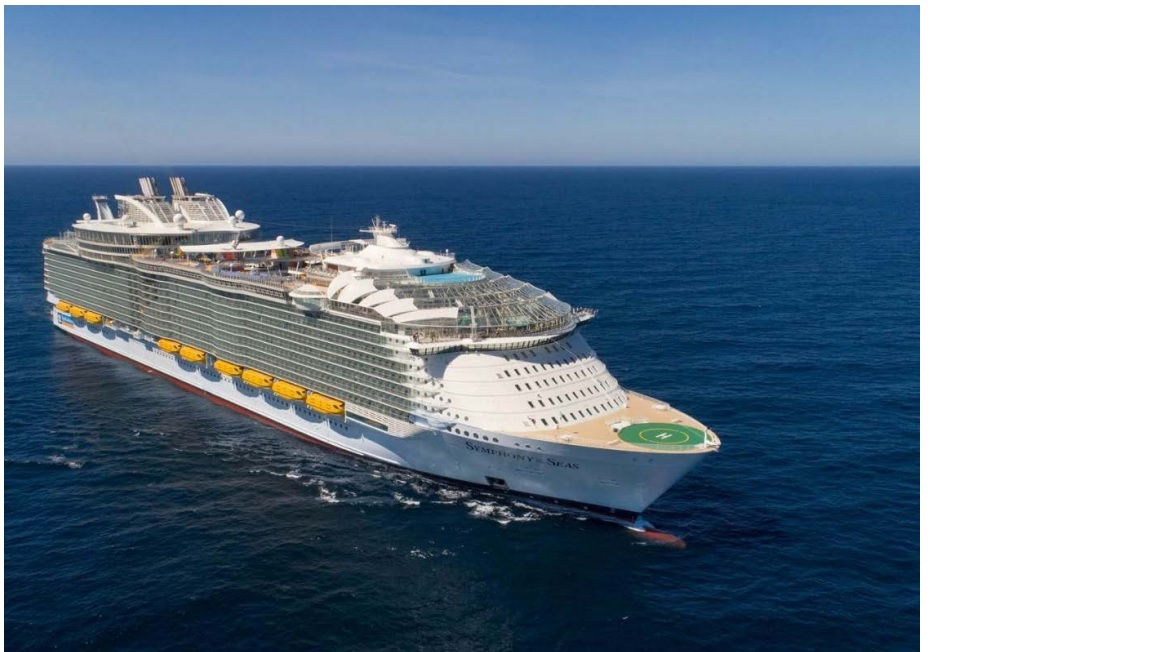

[[[255 255 254]
  [255 255 254]
  [255 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [252 252 252]
  [255 251 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[250 255 255]
  [251 254 255]
  [253 252 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 254]
  [255 255 255]
  [255 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 254]
  [255 255 255]
  [255 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 254]
  [255 255 255]
  [255 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
Type: <class 'numpy.ndarray'>
Shape: (652, 1152, 3)
Top-left pixel: [255 255 254]
Done.


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

im = cv2.imread('/content/gdrive/MyDrive/input/ship.jpg')
cv2_imshow(im)

print(im)
print('Type:', type(im))
print('Shape:', im.shape)
print('Top-left pixel:', im[0, 0])
print('Done.')

## Image processing techniques

### Grayscaling

Grayscaling is the process of reducing the 
dimensionality of the image pixel matrix by only considering the intensity information 
of each pixel, which is represented by the amount of light available

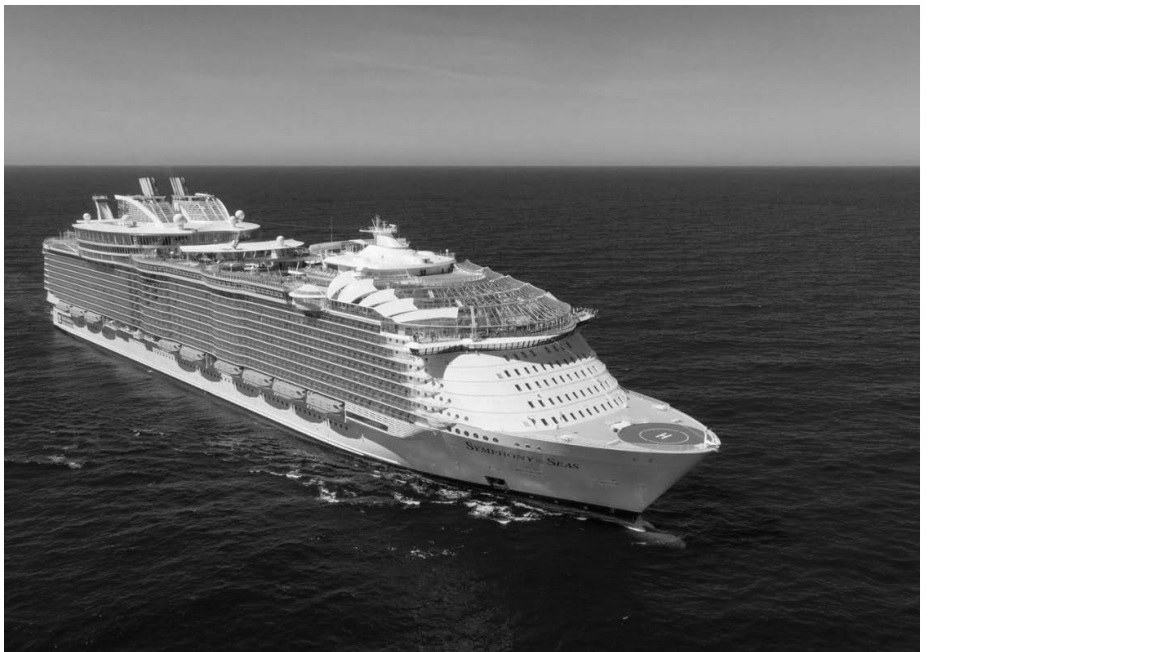

[[255 255 254 ... 255 255 255]
 [255 252 253 ... 255 255 255]
 [254 254 253 ... 255 255 255]
 ...
 [255 255 254 ... 255 255 255]
 [255 255 254 ... 255 255 255]
 [255 255 254 ... 255 255 255]]
Type: <class 'numpy.ndarray'>
Shape: (652, 1152)


In [ ]:
gray_im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_im)

print(gray_im)
print('Type:', type(gray_im))
print('Shape:', gray_im.shape)

### Thresholding
The idea behind thresholding is to replace each pixel in an image with a white pixel if the pixel's intensity is greater than a previously specified threshold, and with a black pixel if the pixel's intensity is less than that threshold.

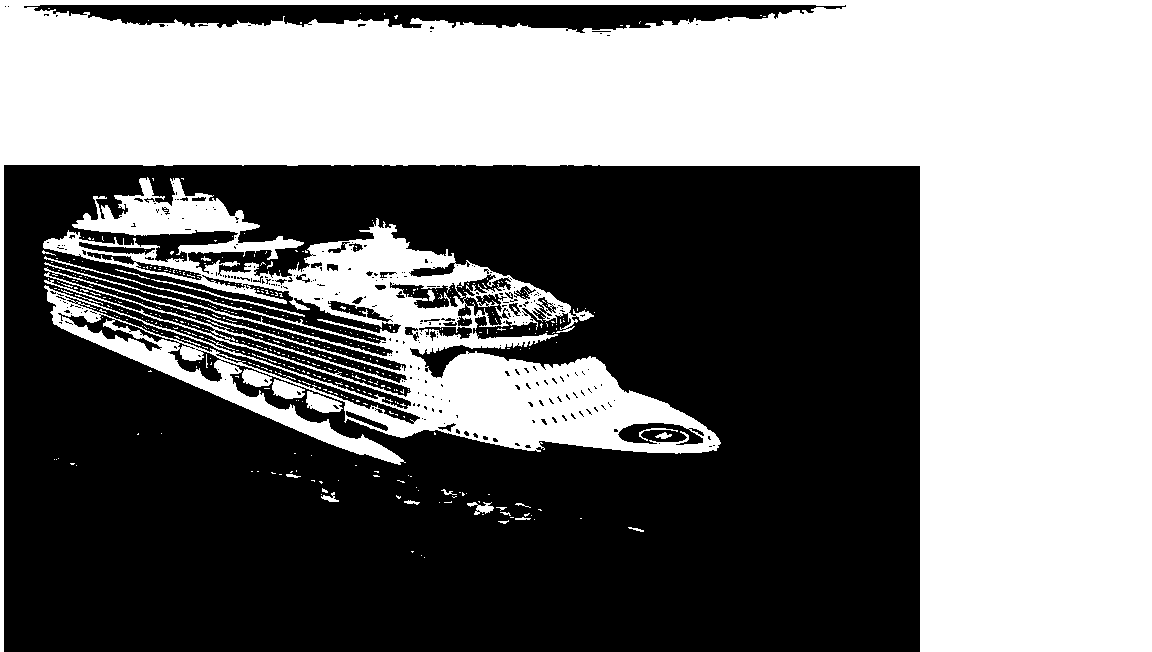

127.0


In [ ]:
ret, custom_thresh_im = cv2.threshold(gray_im, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(custom_thresh_im)

`threshold(src, thresh, maxval, type)` function 

*   `src`: input image,
*   `thresh`: threshold used throughout the mage.
*   `maxval`: pixels whose value >= the threshold will take this value.
*   `type`: thresholding type.





### Applying concurrency to image processing

In [ ]:
from multiprocessing import Pool
import cv2

import sys
from timeit import default_timer as timer

THRESH_METHOD = cv2.ADAPTIVE_THRESH_GAUSSIAN_C
INPUT_PATH = '/content/gdrive/MyDrive/input/large_input/'
OUTPUT_PATH = '/content/gdrive/MyDrive/output/large_output/'

n = 20
names = ['ship_%i_%i.jpg' % (i, j) for i in range(n) for j in range(n)]

def process_threshold(im, output_name, thresh_method):
  gray_im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  thresh_im = cv2.adaptiveThreshold(gray_im, 255, thresh_method, cv2.THRESH_BINARY, 11, 2)
  cv2.imwrite(OUTPUT_PATH + output_name, thresh_im)

for n_processes in range(1, 7):
  start = timer()
  with Pool(n_processes) as p:
    p.starmap(process_threshold, [(cv2.imread(INPUT_PATH + name), name, THRESH_METHOD) for name in names])
    print('Took %.4f seconds with %i process(es).' % (timer() - start, n_processes))
    
print('Done.')

Took 4.1750 seconds with 1 process(es).
Took 3.5763 seconds with 2 process(es).
Took 3.5692 seconds with 3 process(es).
Took 3.5563 seconds with 4 process(es).
Took 3.6775 seconds with 5 process(es).
Took 3.6545 seconds with 6 process(es).
Done.


Further speedup:

In [ ]:
from functools import partial

def process_threshold_parallel_read(name, thresh_method):
  im = cv2.imread(INPUT_PATH + name)
  gray_im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  thresh_im = cv2.adaptiveThreshold(gray_im, 255, thresh_method, cv2.THRESH_BINARY, 11, 2)
  cv2.imwrite(OUTPUT_PATH + name, thresh_im)

for n_processes in range(1, 7):
  start = timer()
  with Pool(n_processes) as p:
    p.map(partial(process_threshold_parallel_read, thresh_method=THRESH_METHOD), names)
    print('Took %.4f seconds with %i process(es).' % (timer() - start, n_processes))
    
print('Done.')

Took 4.4683 seconds with 1 process(es).
